In [7]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [9]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [10]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"

In [11]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=4)
    curr_image_dir = os.path.join(const.dir.images_hp_v4(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v4(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v4(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/225 [00:00<?, ?it/s]

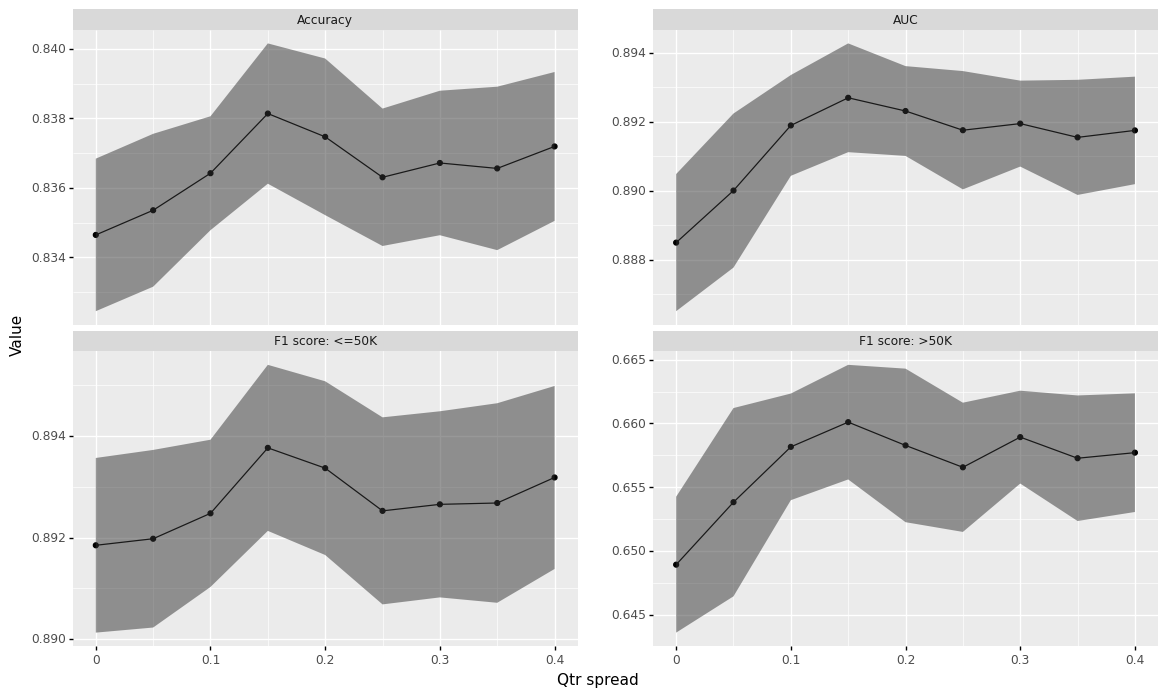

In [12]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [13]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.834648,0.888490,0.770389,0.891846,0.648931,0.002193,0.001989,0.002942,0.001722,0.005328
1,0.05,0.835357,0.890000,0.772903,0.891976,0.653830,0.002198,0.002235,0.003789,0.001751,0.007381
2,0.10,0.836422,0.891889,0.775322,0.892477,0.658168,0.001638,0.001462,0.002054,0.001451,0.004180
3,0.15,0.838138,0.892692,0.776937,0.893767,0.660107,0.002017,0.001578,0.002481,0.001637,0.004493
4,0.20,0.837469,0.892308,0.775824,0.893367,0.658281,0.002252,0.001303,0.003326,0.001712,0.006019
5,0.25,0.836305,0.891751,0.774545,0.892525,0.656565,0.001976,0.001716,0.002304,0.001844,0.005066
6,0.30,0.836717,0.891943,0.775793,0.892654,0.658932,0.002078,0.001247,0.001875,0.001835,0.003640
7,0.35,0.836560,0.891543,0.774978,0.892680,0.657276,0.002350,0.001670,0.002657,0.001967,0.004922
8,0.40,0.837193,0.891745,0.775449,0.893184,0.657714,0.002141,0.001559,0.002467,0.001804,0.004652


  0%|          | 0/230 [00:00<?, ?it/s]

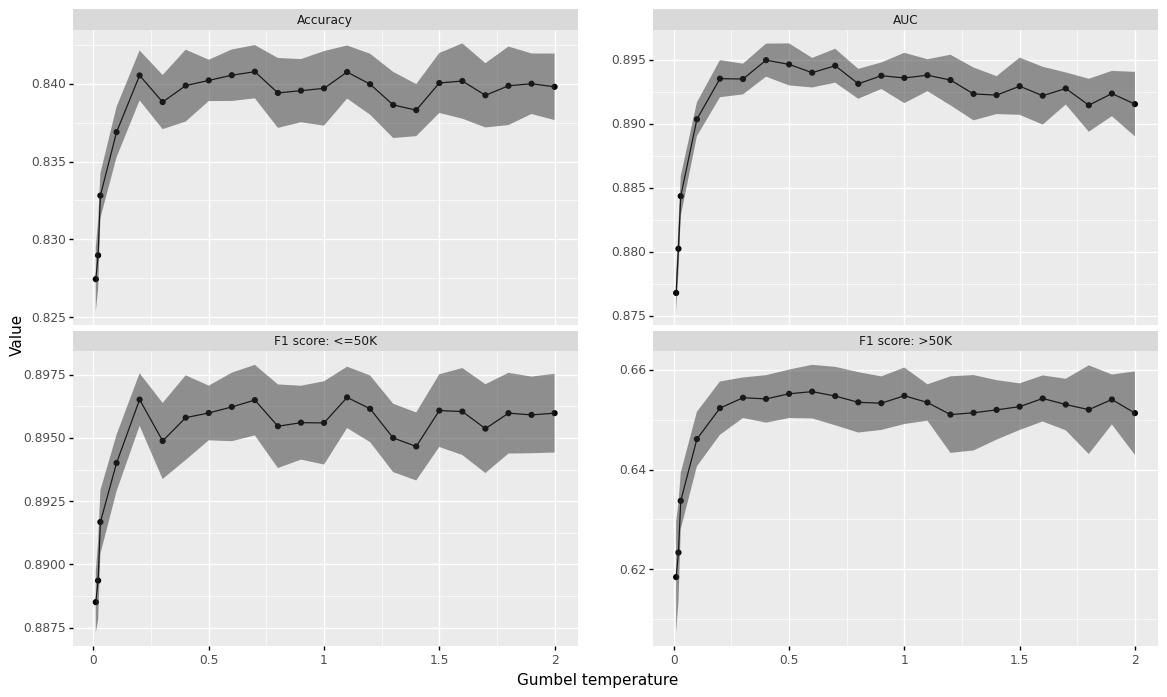

In [14]:
result_gumbel_temperature = plot_hp_tuning("gumbel_temperature")

In [15]:
result_gumbel_temperature

,Gumbel temperature,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.01,0.827457,0.876794,0.753464,0.888505,0.618423,0.002054,0.001426,0.005757,0.001207,0.011139
1,0.02,0.828984,0.880247,0.756352,0.889358,0.623347,0.002180,0.001811,0.005054,0.001557,0.009869
2,0.03,0.832815,0.884359,0.762700,0.891677,0.633723,0.001432,0.001562,0.002700,0.001261,0.005652
3,0.10,0.836886,0.890366,0.770059,0.894013,0.646104,0.001616,0.001318,0.002970,0.001119,0.005471
4,0.20,0.840518,0.893535,0.774419,0.896524,0.652315,0.001601,0.001452,0.002976,0.001040,0.005343
5,0.30,0.838811,0.893507,0.774642,0.894885,0.654398,0.001736,0.001198,0.002024,0.001506,0.004067
6,0.40,0.839867,0.894980,0.774986,0.895808,0.654164,0.002305,0.001293,0.002934,0.001676,0.004759
7,0.50,0.840199,0.894649,0.775590,0.895993,0.655188,0.001325,0.001640,0.002440,0.001082,0.004865
8,0.60,0.840531,0.894002,0.775928,0.896231,0.655624,0.001651,0.001156,0.002702,0.001356,0.005372
9,0.70,0.840757,0.894545,0.775617,0.896501,0.654733,0.001706,0.001325,0.002947,0.001397,0.005861


  0%|          | 0/250 [00:00<?, ?it/s]

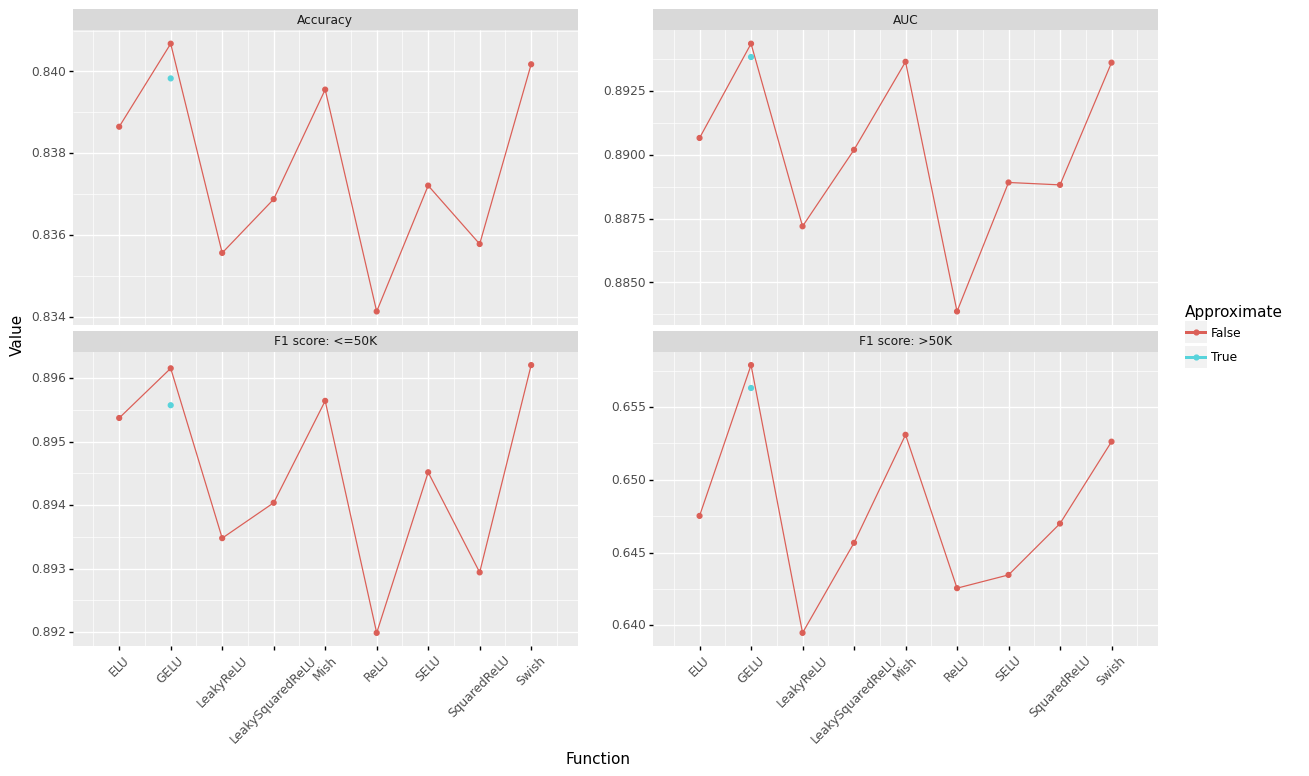

In [24]:
result_activation_function = plot_hp_tuning("activation_function", x_tick_angle=45, n_synthetic_datasets=25)

In [17]:
result_activation_function

,Function,Approximate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,ELU,False,0.838648,0.890655,0.771446,0.895371,0.647520,0.001952,0.001124,0.002838,0.001455,0.005076
1,GELU,False,0.840680,0.894346,0.777017,0.896153,0.657880,0.002218,0.001880,0.003145,0.001674,0.005605
2,GELU,True,0.839830,0.893822,0.775939,0.895572,0.656305,0.002024,0.001342,0.003311,0.001582,0.006340
3,LeakyReLU,False,0.835562,0.887197,0.766481,0.893480,0.639482,0.002028,0.002302,0.004593,0.001211,0.008540
4,LeakySquaredReLU,False,0.836876,0.890193,0.769853,0.894037,0.645669,0.002628,0.002320,0.004965,0.001743,0.009026
5,Mish,False,0.839556,0.893637,0.774367,0.895641,0.653092,0.001653,0.001680,0.003412,0.001020,0.006242
6,ReLU,False,0.834130,0.883865,0.767271,0.891990,0.642553,0.002651,0.003393,0.004863,0.001915,0.009139
7,SELU,False,0.837208,0.888913,0.768991,0.894517,0.643464,0.002141,0.001932,0.003856,0.001430,0.006939
8,SquaredReLU,False,0.835780,0.888819,0.769967,0.892942,0.646993,0.002523,0.002060,0.005655,0.002436,0.012210
9,Swish,False,0.840175,0.893603,0.774411,0.896204,0.652619,0.001740,0.001607,0.003716,0.001107,0.006926


  0%|          | 0/40 [00:00<?, ?it/s]

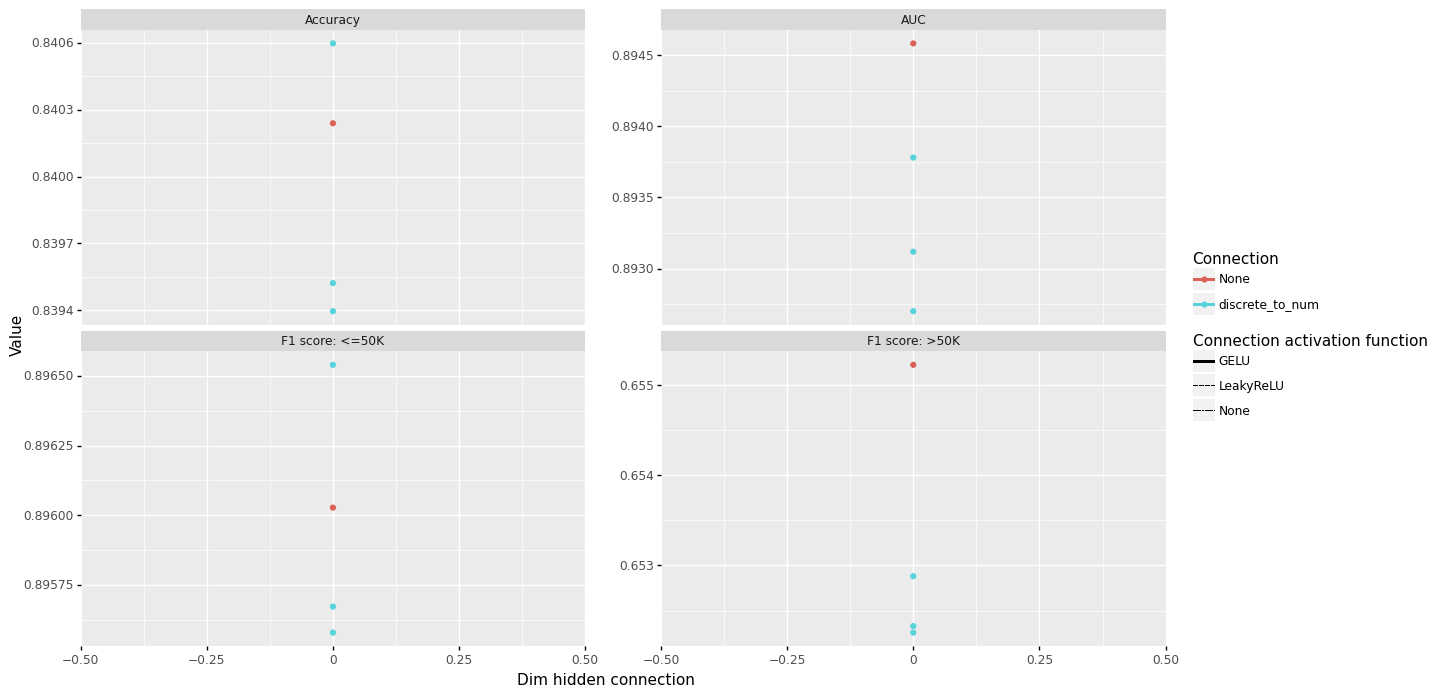

In [18]:
result_add_connection_advanced = plot_hp_tuning("add_connection_advanced")

In [19]:
result_add_connection_advanced

,Dim hidden connection,Connection,Connection activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,None,None,0.840239,0.894583,0.775628,0.896028,0.655228,0.002030,0.001331,0.002328,0.001500,0.003581
1,0,discrete_to_num,GELU,0.839522,0.893118,0.774000,0.895673,0.652327,0.001538,0.001314,0.003734,0.001116,0.007396
2,0,discrete_to_num,LeakyReLU,0.839396,0.892700,0.773917,0.895580,0.652255,0.002328,0.001394,0.003510,0.001635,0.006065
3,0,discrete_to_num,None,0.840598,0.893780,0.774710,0.896539,0.652881,0.002023,0.001243,0.002533,0.001519,0.004266


  0%|          | 0/170 [00:00<?, ?it/s]

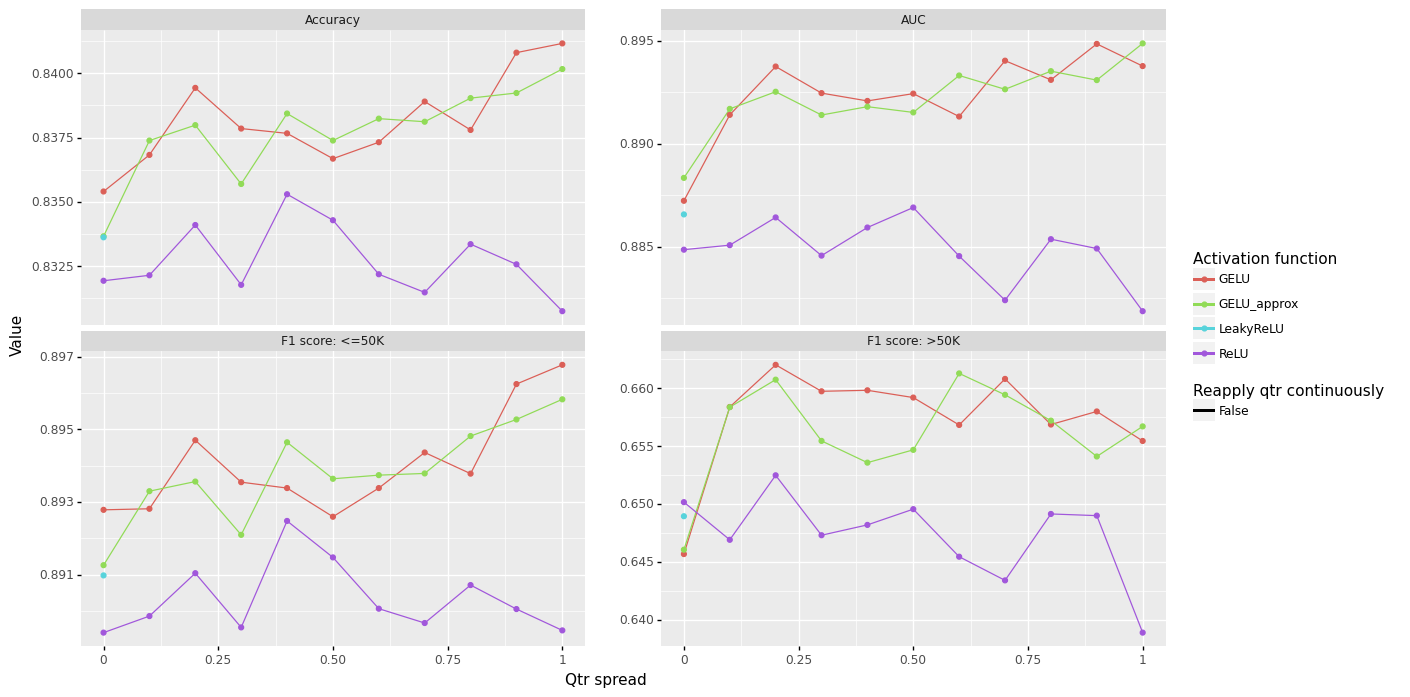

In [20]:
result_spread_and_activation = plot_hp_tuning("spread_and_activation", n_synthetic_datasets=5)

In [21]:
result_spread_and_activation

,Qtr spread,Activation function,Reapply qtr continuously,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.0,GELU,False,0.835405,0.887233,0.769231,0.892782,0.645681,0.002903,0.002331,0.007491,0.001346,0.013899
1,0.0,GELU_approx,False,0.833665,0.888347,0.768657,0.891257,0.646057,0.002528,0.002090,0.004507,0.002138,0.009121
2,0.0,LeakyReLU,False,0.833625,0.886570,0.769962,0.890976,0.648948,0.002190,0.001642,0.002183,0.001642,0.002897
3,0.0,ReLU,False,0.831939,0.884855,0.769782,0.889401,0.650164,0.002194,0.002485,0.003962,0.001287,0.006790
4,0.1,GELU,False,0.836826,0.891411,0.775597,0.892811,0.658383,0.001389,0.001064,0.001866,0.001069,0.003288
5,0.1,GELU_approx,False,0.837384,0.891701,0.775831,0.893295,0.658368,0.002930,0.002541,0.004364,0.001885,0.006964
6,0.1,ReLU,False,0.832151,0.885075,0.768384,0.889856,0.646912,0.002580,0.001986,0.002971,0.002766,0.007864
7,0.2,GELU,False,0.839429,0.893761,0.778360,0.894698,0.662022,0.001672,0.001327,0.002582,0.001154,0.004422
8,0.2,GELU_approx,False,0.837981,0.892535,0.777151,0.893560,0.660742,0.001909,0.001200,0.000953,0.001949,0.003382
9,0.2,ReLU,False,0.834104,0.886423,0.771759,0.891037,0.652482,0.001867,0.001151,0.002242,0.001542,0.004144


In [ ]:
result_spread_and_activations = plot_hp_tuning("spread_and_activations")

In [22]:
#result_spread_and_activations

  0%|          | 0/190 [00:00<?, ?it/s]

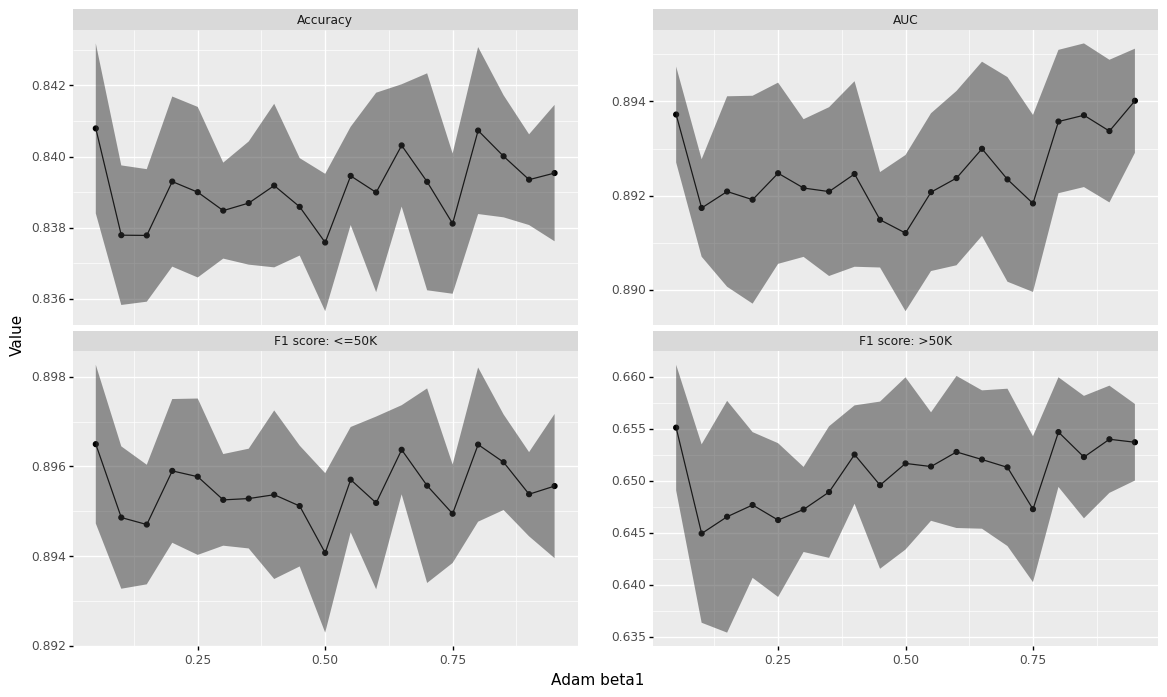

In [23]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")